강남대 201904209 산업데이터사이언스 서명훈
- 주제: 코로나 바이러스
- 목적: 사태 파악 및 대처 방안
- 데이터: 코로나 바이러스 일일 확진자 수 등
- 기간: 2020.02.15 ~ 2021.02.26

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
covid_n = pd.read_excel('Korea_COVID19_20210226.xlsx')
covid_level = pd.read_excel('Korea_COVID19_distLevel.xlsx')

In [3]:
# 데이터 합치기
covid_merge = pd.merge(covid_n,covid_level)

In [4]:
# 요일 불러오기
covid_group = (
    covid_merge
    .groupby([covid_merge['Date'],
              covid_merge['Date'].dt.day_name().rename('day')])
    .sum()
    .reset_index()
)

In [5]:
# 코로나 거리두기 단계
covid = covid_group.set_index('Date')
covid

,day,AccuConfirm,AccuRecover,NewConfirm,AccuValidConf,Level
Date,,,,,,
2020-02-15,Saturday,29,9,0.0,20,1.0
2020-02-16,Sunday,30,10,1.0,20,1.0
2020-02-17,Monday,31,12,1.0,19,1.0
2020-02-18,Tuesday,51,16,20.0,35,1.0
2020-02-19,Wednesday,104,16,53.0,88,1.0
...,...,...,...,...,...,...
2021-02-22,Monday,87680,78394,356.0,9286,2.0
2021-02-23,Tuesday,88120,79050,440.0,9070,2.0
2021-02-24,Wednesday,88516,79487,396.0,9029,2.0


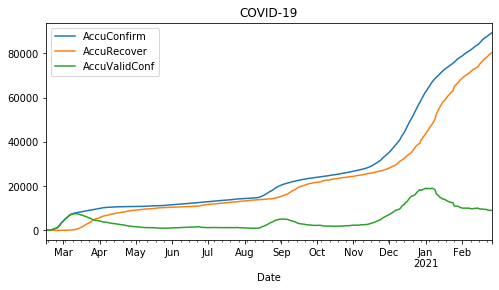

In [6]:
# 일일 확진자 수, 격리해제 수, 실질확진자 수 선 그래프
fig, ax = plt.subplots(figsize=(8, 4))
(
    covid
    .resample('D')
    [['AccuConfirm','AccuRecover','AccuValidConf']]
    .sum()
    .plot(title='COVID-19', ax=ax)
)

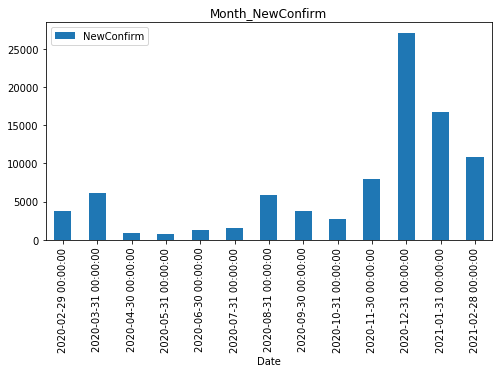

In [7]:
# 월별 확진자 수 막대 그래프
fig, ax = plt.subplots(figsize=(8, 4))
(
    covid
    .resample('M')
    [['NewConfirm']]
    .sum()
    .plot(title='Month_NewConfirm', ax=ax, kind='bar')
)

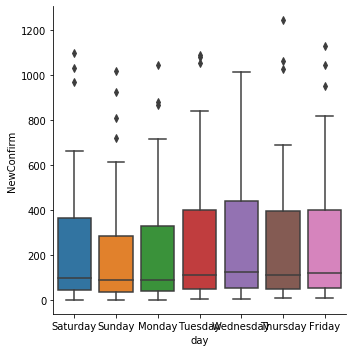

In [8]:
# 요일별 확진자 수를 catplot으로나타내기
# 수요일에 확진자 수가 많은 것으로 보임
sns.catplot(x='day', y='NewConfirm', data=covid, kind='box')

In [9]:
# 잠시적으로 레벨 값 올리기
covid = covid_group.set_index('Date')
covid.Level = (covid.Level-1)*800

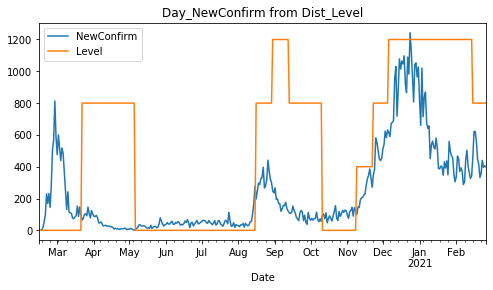

In [19]:
# 거리두기 단계에 따른 일일 확진자 수 선 그래프
# (현재부터 중간 보고서 피드백에 따른 분석 추가 내용)
fig, ax = plt.subplots(figsize=(8, 4))
(
    covid
    .resample('D')
    [['NewConfirm','Level']]
    .sum()
    .plot(title='Day_NewConfirm from Dist_Level', ax=ax)
)

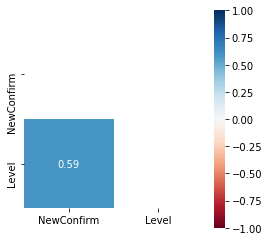

In [11]:
# 거리두기 단계와 일일확진자 수의 상관관계
# 0.59로 어느 정도의 상관관계가 있음
fig, ax = plt.subplots(figsize=(4, 4))
corr = covid[['NewConfirm', 'Level']].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(
    corr,
    mask=mask,
    fmt='.2f',
    annot=True,
    ax=ax,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square=True
)

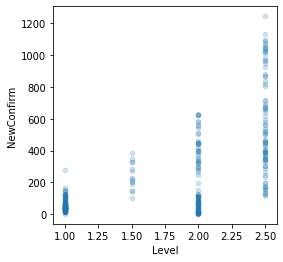

In [12]:
# 거리두기 단계에 따른 일일 확진자 수 산포도
# 단계가 높아질 수록 일일 확진자 수도 높아짐
# 4월 이전에는 단계를 지정하지 않았으므로 제외
fig, ax = plt.subplots(figsize=(4, 4))
covid_group[covid_group.Date.between('2020-4','2021-3')].plot.scatter(
    x='Level',
    y='NewConfirm',
    alpha=.2,
    ax=ax
)

In [13]:
# 거리두기 단계에 따라서 확진자 수는 얼마나 적어지거나 많아지는가?
# 일일별로 확진자 수 차이 데이터 제작
ConfirmDiff=[0]
for i in covid_n.index:
    if i == 377:
        break
    else:
        ConfirmDiff.append(covid.NewConfirm[i+1] - covid.NewConfirm[i])

covid_ConfirmDiff = pd.DataFrame({
    'Date':covid_n.Date[:378],
    'ConfirmDiff':ConfirmDiff
})
covid_diff = pd.merge(covid_merge,covid_ConfirmDiff)
covid_diff

,Date,AccuConfirm,AccuRecover,NewConfirm,AccuValidConf,Level,ConfirmDiff
0,2020-02-15,29,9,NaN,20,1.0,0.0
1,2020-02-16,30,10,1.0,20,1.0,1.0
2,2020-02-17,31,12,1.0,19,1.0,0.0
3,2020-02-18,51,16,20.0,35,1.0,19.0
4,2020-02-19,104,16,53.0,88,1.0,33.0
...,...,...,...,...,...,...,...
373,2021-02-22,87680,78394,356.0,9286,2.0,24.0
374,2021-02-23,88120,79050,440.0,9070,2.0,84.0
375,2021-02-24,88516,79487,396.0,9029,2.0,-44.0
376,2021-02-25,88922,79880,406.0,9042,2.0,10.0


In [14]:
covid_diff2 = covid_diff[covid_diff.Date.between('2020-4','2021-3')]
covid_diff3 = covid_diff2.set_index('Date')
covid_diff4 = (
    covid_diff3
    .resample('D')
    [['ConfirmDiff', 'Level']]
    .sum()
)

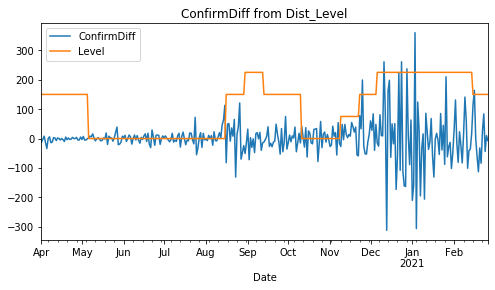

In [15]:
# 거리두기 단계가 높을 때 확진자차이의 폭이 커짐
covid_diff4.Level = (covid_group.set_index('Date').Level-1)*150

fig, ax = plt.subplots(figsize=(8, 4))
covid_diff4.plot(title='ConfirmDiff from Dist_Level', ax=ax)

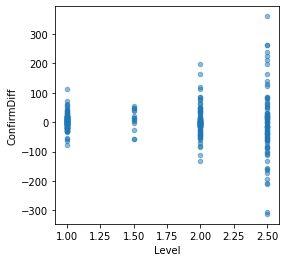

In [16]:
# 산포도로 확인
fig, ax = plt.subplots(figsize=(4, 4))
covid_diff3.plot.scatter(
    x='Level',
    y='ConfirmDiff',
    alpha=.5,
    ax=ax
)

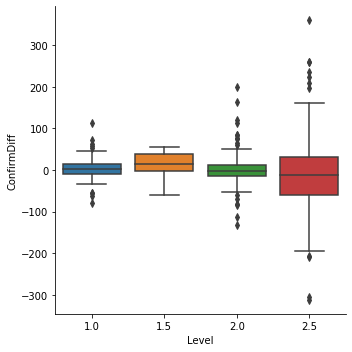

In [17]:
# 박스 캐트플롯으로도 확인
sns.catplot(x='Level', y='ConfirmDiff', data=covid_diff3, kind='box')

In [18]:
# 위 결론 : 아직도 폭이 크므로 더 높은 단계의 거리두기 조정이 필요해보임